# Python Final Project (Statlog Data Set)

## Preparation 

In [129]:
# Import the necessary library
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [103]:
# Path to our training set
path = "D:/A4_ESILV/Python/Final_Project/sat.trn"

In [104]:
# Verify the path existence
assert(os.path.isfile(path))

In [105]:
# Dataframe creation
df = pd.read_csv(path,sep = "\s+", header=None)

In [106]:
# Check is we have missing value
df.isna().describe()

#There is no missing value which is pretty great

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435,...,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435,...,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435


In [107]:
# Adding columns detailling nzme
df.columns = [
             'TLP/SB1', 'TLP/SB2', 'TLP/SB3', 'TLP/SB4', #Top Left Pixel Spectral Band
             'TMP/SB1', 'TMP/SB2', 'TMP/SB3', 'TMP/SB4', #Top Middle Pixel Spectral Band
             'TRP/SB1', 'TRP/SB2', 'TRP/SB3', 'TRP/SB4', #Top Right Pixel Spectral Band
             
             'MLP/SB1', 'MLP/SB2', 'MLP/SB3', 'MLP/SB4', #Middle Left Pixel Spectral Band
             'MMP/SB1', 'MMP/SB2', 'MMP/SB3', 'MMP/SB4', #Middle Middle Pixel Spectral Band
             'MRP/SB1', 'MRP/SB2', 'MRP/SB3', 'MRP/SB4', #Middle Right Pixel Spectral Band
             
             'BLP/SB1', 'BLP/SB2', 'BLP/SB3', 'BLP/SB4', #Bottom Left Pixel Spectral Band
             'BMP/SB1', 'BMP/SB2', 'BMP/SB3', 'BMP/SB4', #Bottom Middle Pixel Spectral Band
             'BRP/SB1', 'BRP/SB2', 'BRP/SB3', 'BRP/SB4', #Bottom Right Pixel Spectral Band
              
              'Class'
            ]

In [108]:
# Convert the last columns class from number to the soil type corresponding and add a new columns with this soil type
soilType = {1: "Red soil",
           2: "Cotton crop",
           3: "Grey soil",
           4: "Damp grey soil",
           5: "Soil with vegetation stubble",
           6: "Mixture class (all types present)",
           7: "Very damp grey soil"}
df["Soil_Type"] = df["Class"]
df["Soil_Type"] = df.Class.map(soilType)

In [109]:
# See all columns name
df.columns

#We can remark that the column have been well rename and our new column "Soil_Type" well implemented

Index(['TLP/SB1', 'TLP/SB2', 'TLP/SB3', 'TLP/SB4', 'TMP/SB1', 'TMP/SB2',
       'TMP/SB3', 'TMP/SB4', 'TRP/SB1', 'TRP/SB2', 'TRP/SB3', 'TRP/SB4',
       'MLP/SB1', 'MLP/SB2', 'MLP/SB3', 'MLP/SB4', 'MMP/SB1', 'MMP/SB2',
       'MMP/SB3', 'MMP/SB4', 'MRP/SB1', 'MRP/SB2', 'MRP/SB3', 'MRP/SB4',
       'BLP/SB1', 'BLP/SB2', 'BLP/SB3', 'BLP/SB4', 'BMP/SB1', 'BMP/SB2',
       'BMP/SB3', 'BMP/SB4', 'BRP/SB1', 'BRP/SB2', 'BRP/SB3', 'BRP/SB4',
       'Class', 'Soil_Type'],
      dtype='object')

In [110]:
#See all columns type
df.dtypes

#We remark that except the column Soil_Type all the other columns contains integer number data

TLP/SB1       int64
TLP/SB2       int64
TLP/SB3       int64
TLP/SB4       int64
TMP/SB1       int64
TMP/SB2       int64
TMP/SB3       int64
TMP/SB4       int64
TRP/SB1       int64
TRP/SB2       int64
TRP/SB3       int64
TRP/SB4       int64
MLP/SB1       int64
MLP/SB2       int64
MLP/SB3       int64
MLP/SB4       int64
MMP/SB1       int64
MMP/SB2       int64
MMP/SB3       int64
MMP/SB4       int64
MRP/SB1       int64
MRP/SB2       int64
MRP/SB3       int64
MRP/SB4       int64
BLP/SB1       int64
BLP/SB2       int64
BLP/SB3       int64
BLP/SB4       int64
BMP/SB1       int64
BMP/SB2       int64
BMP/SB3       int64
BMP/SB4       int64
BRP/SB1       int64
BRP/SB2       int64
BRP/SB3       int64
BRP/SB4       int64
Class         int64
Soil_Type    object
dtype: object

In [111]:
#See a small part of our data
df.head()

,TLP/SB1,TLP/SB2,TLP/SB3,TLP/SB4,TMP/SB1,TMP/SB2,TMP/SB3,TMP/SB4,TRP/SB1,TRP/SB2,...,BMP/SB1,BMP/SB2,BMP/SB3,BMP/SB4,BRP/SB1,BRP/SB2,BRP/SB3,BRP/SB4,Class,Soil_Type
0,92,115,120,94,84,102,106,79,84,102,...,88,121,128,100,84,107,113,87,3,Grey soil
1,84,102,106,79,84,102,102,83,80,102,...,84,107,113,87,84,99,104,79,3,Grey soil
2,84,102,102,83,80,102,102,79,84,94,...,84,99,104,79,84,99,104,79,3,Grey soil
3,80,102,102,79,84,94,102,79,80,94,...,84,99,104,79,84,103,104,79,3,Grey soil
4,84,94,102,79,80,94,98,76,80,102,...,84,103,104,79,79,107,109,87,3,Grey soil


## Visualization

In [1]:
df.describe()

NameError: name 'df' is not defined

In [114]:
# See the repartition of soil type
df.groupby(["Soil_Type"]).size().reset_index(name="counts")

#There is no data for "Mixture class (all types present)" and there is a lot more "Grey soil", "Red Soil" and "Very damp grey soil" than 
#"Cotton crop", "Damp grey soil" and "Soil with vegetation".
#So, we can say that we will certainly have best result with this 3 soil type as we have more training data. 
#And this dataset will not allow us to predict "Mixture class (all types present)"

,Soil_Type,counts
0,Cotton crop,479
1,Damp grey soil,415
2,Grey soil,961
3,Red soil,1072
4,Soil with vegetation stubble,470
5,Very damp grey soil,1038


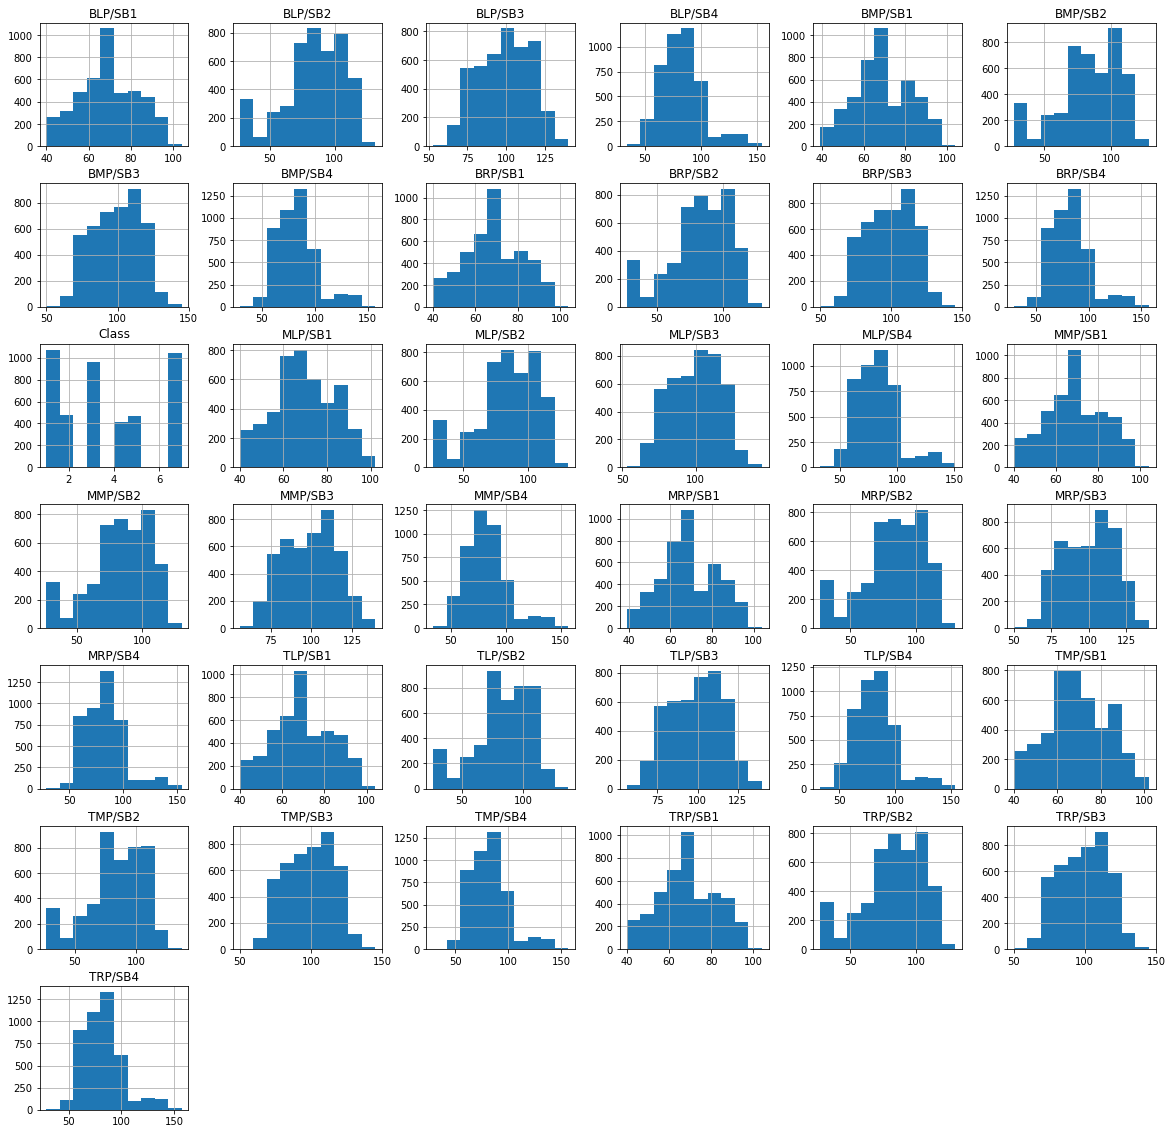

In [128]:
histogram = df.hist(figsize = (20,20))
plt.show()

## Modelization

### Share the dataset into two different set : training and test set

In [117]:
data = df.drop({"Class", "Soil_Type"}, axis="columns") #Data without class features
sol = df["Class"] #Class features of X

data_train, data_test, sol_train, sol_test = train_test_split(data, sol, test_size=0.25)
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### Try different algorithm

In [118]:
# Create a dictionnary for store the result of our algorithms
models_Fitting = {}

In [119]:
# Decision Tree Classifier
model = DecisionTreeClassifier().fit(data_train, sol_train)
models_Fitting['Decision Tree Classifier'] = model.score(data_test, sol_test)

In [120]:
# Gaussian Naive Bayes
model2 = GaussianNB().fit(data_train, sol_train)
models_Fitting['Gaussian Naive Bayes'] = model2.score(data_test, sol_test)

In [121]:
# Random Forest Tree
model3 = RandomForestRegressor().fit(data_train, sol_train)
models_Fitting['Random Forest Tree'] = model3.score(data_test, sol_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [122]:
# Epsilon-Support Vector Regression
model4 = svm.SVR().fit(data_train, sol_train)
models_Fitting['Epsilon-Support Vector Regression'] = model4.score(data_test, sol_test)

In [123]:
# Kmeans
model5 = KMeans(n_clusters=6).fit(data_train, sol_train)
models_Fitting['KMeans'] = accuracy_score(sol_test, model5.predict(data_test))

In [124]:
#Change the hyperparameters

In [125]:
#Display the plot which compare the result of the different algorythm
df_models = pd.DataFrame.from_dict(models_Fitting, orient = 'index', columns = ['Accuracy'])
df_models

,Accuracy
Decision Tree Classifier,0.862038
Gaussian Naive Bayes,0.806132
Random Forest Tree,0.887356
Epsilon-Support Vector Regression,0.867891
KMeans,0.102795


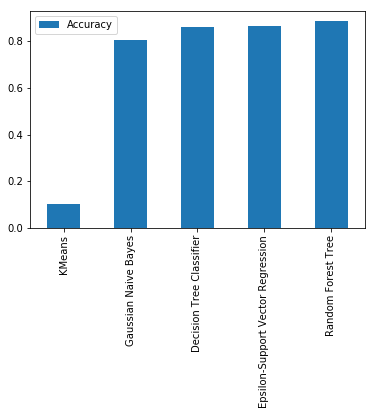

In [126]:
df_sorted = df_models.sort_values('Accuracy')
plot = df_sorted.plot.bar()
plt.show()